# Census Income Prediction

## Introduction About the Data

Prediction task is to determine whether a person makes over 50K a year. (Classification Analysis)

There are 14 Independent Variables.

- age: continuous.
- workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
- fnlwgt: continuous.
- education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate 5th-6th, Preschool.
- education-num: continuous.
- marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
- occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct,Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
- relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
- race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
- sex: Female, Male.
- capital-gain: continuous.
- capital-loss: continuous.
- hours-per-week: continuous.
- native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

Target Varibale:
- income: >50K, <=50K.

Dataset Source Link : https://archive.ics.uci.edu/ml/datasets/census+income

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler


%matplotlib inline

In [2]:
df = pd.read_csv("data/adult.csv")

In [3]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
df.shape

(32561, 15)

In [5]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'country', 'income'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  country         32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [7]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
country           0
income            0
dtype: int64

In [8]:
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [9]:
df.nunique()

age                  73
workclass             9
fnlwgt            21648
education            16
education-num        16
marital-status        7
occupation           15
relationship          6
race                  5
sex                   2
capital-gain        119
capital-loss         92
hours-per-week       94
country              42
income                2
dtype: int64

In [10]:
df.duplicated().sum()

24

#### Obeservation: There are 24 duplicate values in the dataset.

In [11]:
#droping duplicates
df.drop_duplicates(keep='first',inplace=True)

In [12]:
df.shape

(32537, 15)

In [13]:
df.duplicated().sum()

0

#### Obeservation: There no duplicate values left in the dataset.

In [14]:
mapping = {' <=50K': 0, ' >50K': 1}

# Use the map() function to apply the mapping
df['income'] = df['income'].map(mapping)

In [15]:
num_col = df.select_dtypes(include=['int64', 'float64'])
cat_col = df.select_dtypes(include=['object'])

In [16]:
num_col.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,income
0,39,77516,13,2174,0,40,0
1,50,83311,13,0,0,13,0
2,38,215646,9,0,0,40,0
3,53,234721,7,0,0,40,0
4,28,338409,13,0,0,40,0


In [17]:
cat_col.head()

,workclass,education,marital-status,occupation,relationship,race,sex,country
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba


In [18]:
num_col.columns

Index(['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss',
       'hours-per-week', 'income'],
      dtype='object')

In [19]:
cat_col.columns

Index(['workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'sex', 'country'],
      dtype='object')

In [20]:
num_col.shape

(32537, 7)

In [21]:
cat_col.shape

(32537, 8)

#### Obeservation:
* There are total 32537 rows and 15 columns in the dataset
* Categorical features = 9 and Numerical features = 6

In [22]:
# finding the unique values in numerical feature
for feature in num_col.columns:
    print(feature)
    print(num_col[feature].unique())
    print("")

age
[39 50 38 53 28 37 49 52 31 42 30 23 32 40 34 25 43 54 35 59 56 19 20 45
 22 48 21 24 57 44 41 29 18 47 46 36 79 27 67 33 76 17 55 61 70 64 71 68
 66 51 58 26 60 90 75 65 77 62 63 80 72 74 69 73 81 78 88 82 83 84 85 86
 87]

fnlwgt
[ 77516  83311 215646 ...  34066  84661 257302]

education-num
[13  9  7 14  5 10 12 11  4 16 15  3  6  2  1  8]

capital-gain
[ 2174     0 14084  5178  5013  2407 14344 15024  7688 34095  4064  4386
  7298  1409  3674  1055  3464  2050  2176   594 20051  6849  4101  1111
  8614  3411  2597 25236  4650  9386  2463  3103 10605  2964  3325  2580
  3471  4865 99999  6514  1471  2329  2105  2885 25124 10520  2202  2961
 27828  6767  2228  1506 13550  2635  5556  4787  3781  3137  3818  3942
   914   401  2829  2977  4934  2062  2354  5455 15020  1424  3273 22040
  4416  3908 10566   991  4931  1086  7430  6497   114  7896  2346  3418
  3432  2907  1151  2414  2290 15831 41310  4508  2538  3456  6418  1848
  3887  5721  9562  1455  2036  1831 11678  2936  299

In [23]:
# finding the unique values in categorical feature
for feature in cat_col.columns:
    print(feature)
    print(cat_col[feature].unique())
    print("")

workclass
[' State-gov' ' Self-emp-not-inc' ' Private' ' Federal-gov' ' Local-gov'
 ' ?' ' Self-emp-inc' ' Without-pay' ' Never-worked']

education
[' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' Assoc-voc' ' 7th-8th' ' Doctorate' ' Prof-school'
 ' 5th-6th' ' 10th' ' 1st-4th' ' Preschool' ' 12th']

marital-status
[' Never-married' ' Married-civ-spouse' ' Divorced'
 ' Married-spouse-absent' ' Separated' ' Married-AF-spouse' ' Widowed']

occupation
[' Adm-clerical' ' Exec-managerial' ' Handlers-cleaners' ' Prof-specialty'
 ' Other-service' ' Sales' ' Craft-repair' ' Transport-moving'
 ' Farming-fishing' ' Machine-op-inspct' ' Tech-support' ' ?'
 ' Protective-serv' ' Armed-Forces' ' Priv-house-serv']

relationship
[' Not-in-family' ' Husband' ' Wife' ' Own-child' ' Unmarried'
 ' Other-relative']

race
[' White' ' Black' ' Asian-Pac-Islander' ' Amer-Indian-Eskimo' ' Other']

sex
[' Male' ' Female']

country
[' United-States' ' Cuba' ' Jamaica' ' India' '

#### Observation:
* It seems to be NaN values in categorical feature in the form of  '?'

In [24]:
#replacing '?' with NaN
cat_col.replace(' ?',np.nan,inplace=True) 

In [25]:
cat_col.isnull().sum()

workclass         1836
education            0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
country            582
dtype: int64

#### Observation:
There are null values in the categorical features. 
* Workclass - 1836
* occupation - 1843
* native_country - 582

<AxesSubplot:>

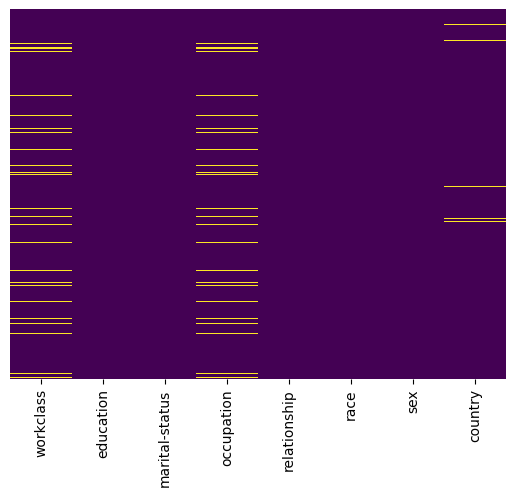

In [26]:
# Checking relative null values for categorical feature
sns.heatmap(cat_col.isnull(),yticklabels=False,cbar=False,cmap='viridis')

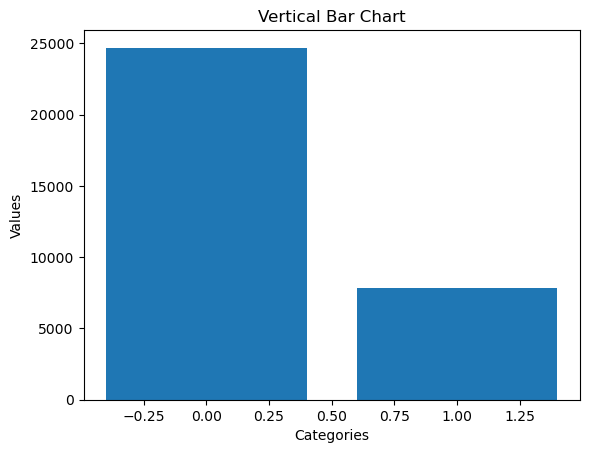

In [28]:
## Checking distribution of our target variable -> income
categories = num_col['income'].unique()
values = num_col['income'].value_counts()

# Create a figure and axes
fig, ax = plt.subplots()

# Plot the vertical bar chart
ax.bar(categories, values, align='center')

# Set labels for x-axis and y-axis
ax.set_xlabel('Categories')
ax.set_ylabel('Values')

# Set title
ax.set_title('Vertical Bar Chart')

# Show the plot
plt.show()


In [29]:
values

0    24698
1     7839
Name: income, dtype: int64

#### Observation:
* Dataset is slidely imbalanced.
* Total records - 32537
* income <=50K - 24698 records 76% approx
* income >50K  - 7839  records 24% approx

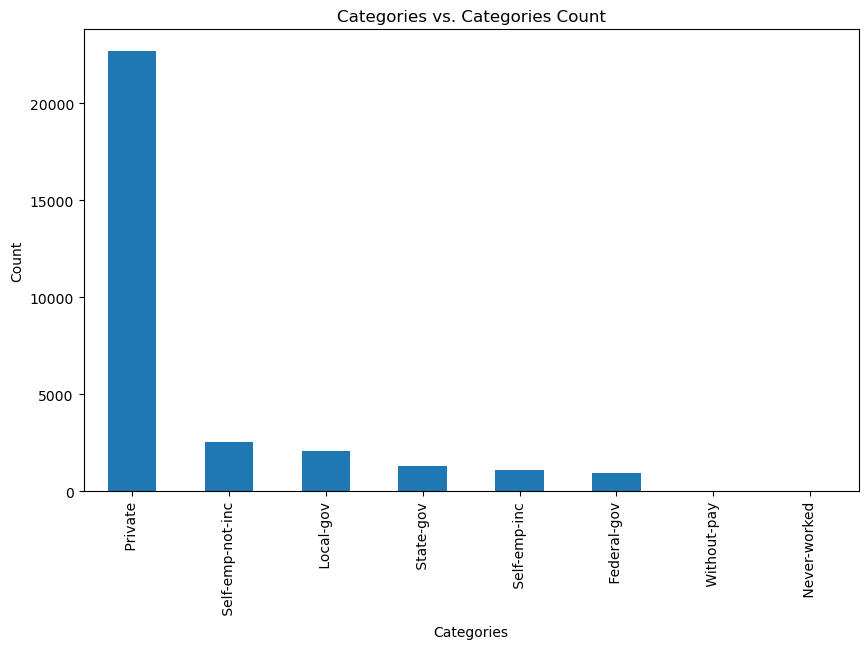

In [30]:
## Checking Distribution of workclass feature

plt.figure(figsize=(10, 6)) 
cat_col['workclass'].value_counts().plot(kind='bar', stacked=True)
plt.xlabel('Categories')
plt.ylabel('Count')
plt.title('Categories vs. Categories Count')

plt.show()

#### Observation:
* Most frequent category in workclass is "Private" 
* Every category contains both income classes.
* Except self-emp-inc every category major income class is "<=50k"

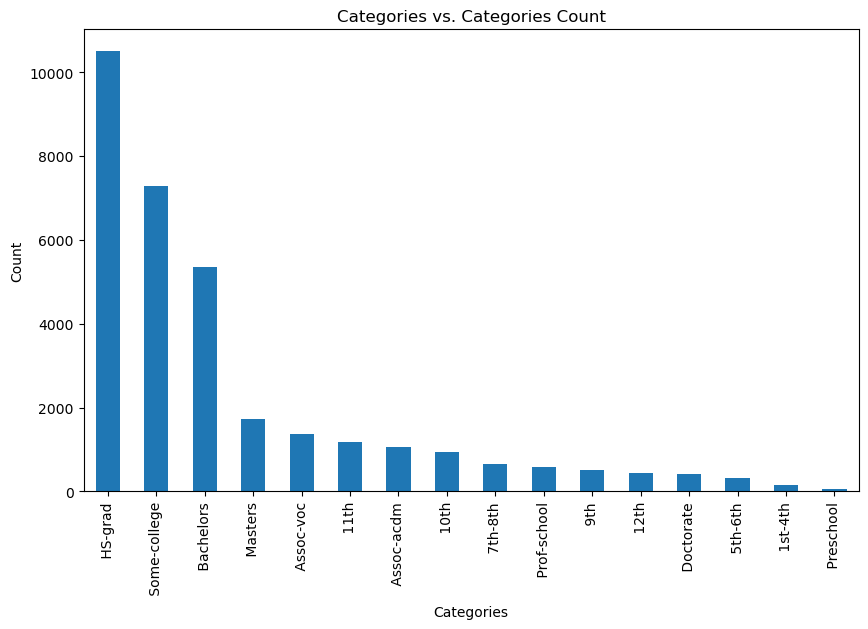

In [31]:
## Checking Distribution of education feature

plt.figure(figsize=(10, 6)) 
cat_col['education'].value_counts().plot(kind='bar', stacked=True)
plt.xlabel('Categories')
plt.ylabel('Count')
plt.title('Categories vs. Categories Count')

plt.show()

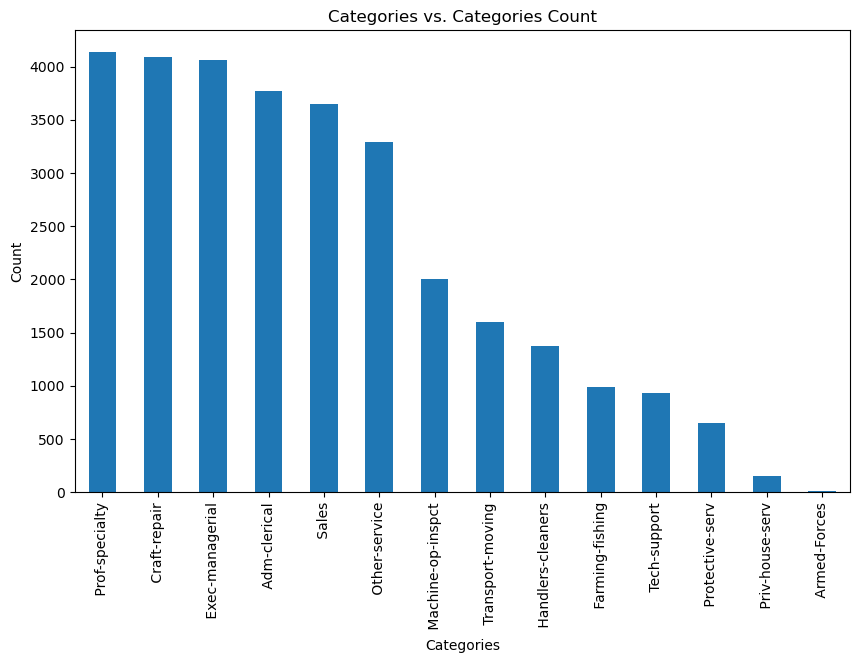

In [32]:
## Checking Distribution of occupation feature

plt.figure(figsize=(10, 6)) 
cat_col['occupation'].value_counts().plot(kind='bar', stacked=True)
plt.xlabel('Categories')
plt.ylabel('Count')
plt.title('Categories vs. Categories Count')

plt.show()

In [33]:
cat_col.head()

,workclass,education,marital-status,occupation,relationship,race,sex,country
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba


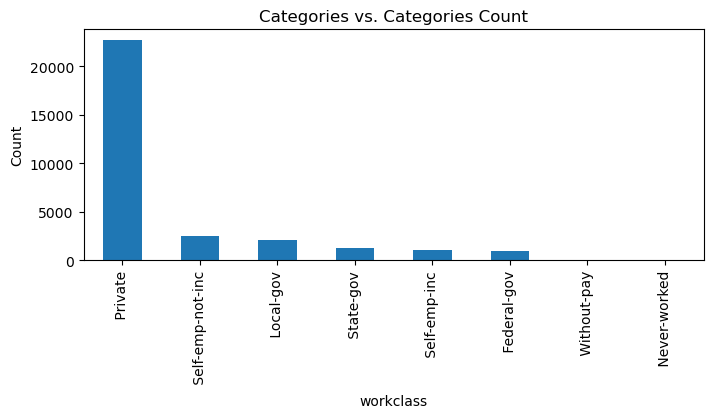

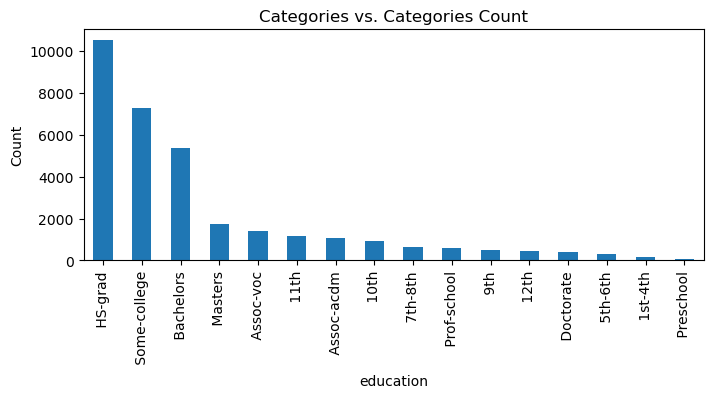

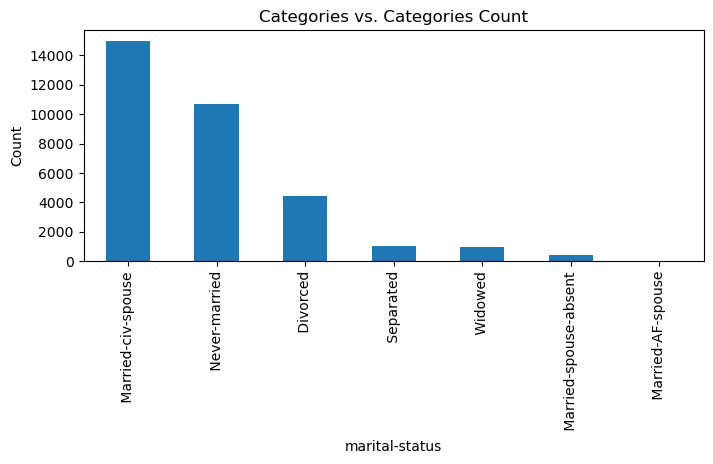

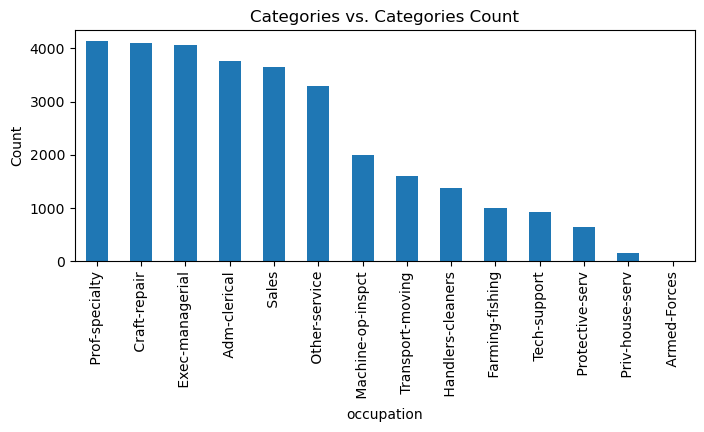

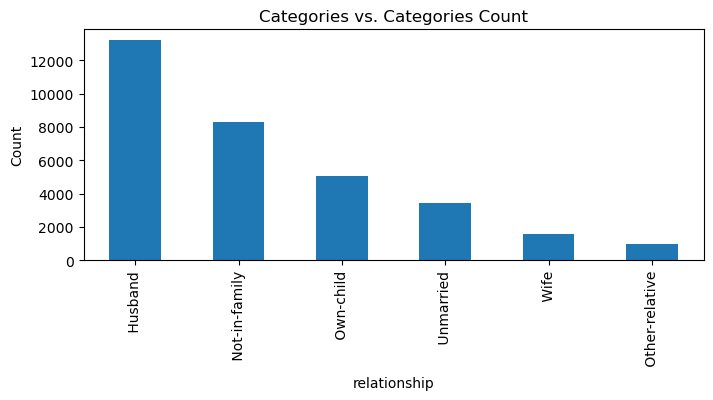

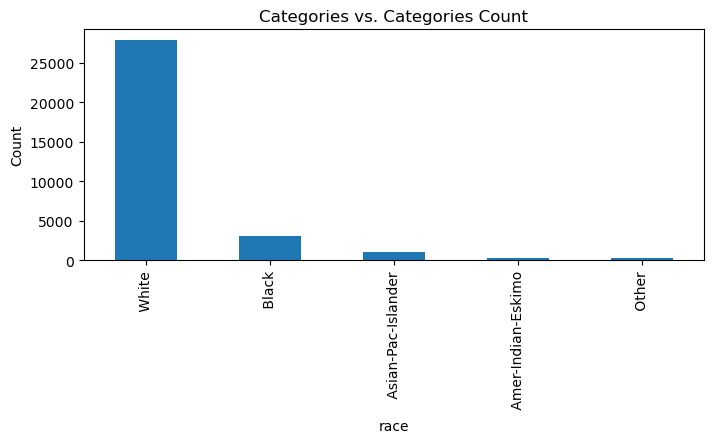

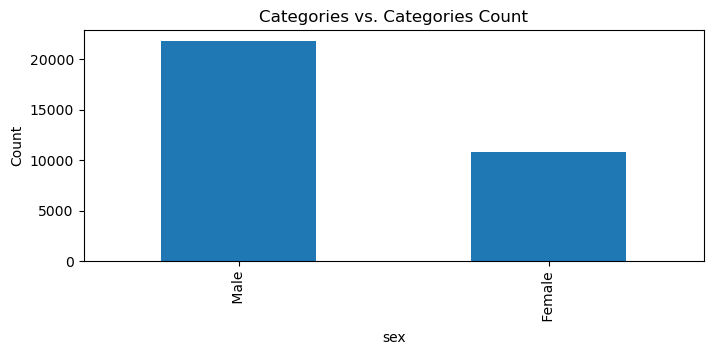

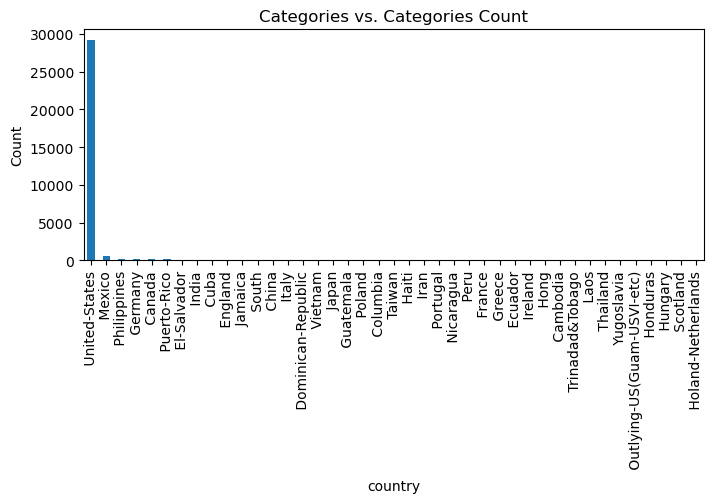

In [37]:
for feature in cat_col.columns:
    plt.figure(figsize=(8, 3)) 
    cat_col[feature].value_counts().plot(kind='bar', stacked=True)
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.title('Categories vs. Categories Count')

    plt.show()

In [38]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew,kurtosis
# Calculate skewness
def skewkness(data):
    data_skewness = skew(data)
    print("Skewness:", data_skewness)

    if data_skewness< 0:
        print("Left skew distribution")
    elif data_skewness > 0 :
        print("Right skew distribution")
    else:
        print("Symmetrical distribution")
        
def calculate_kurtosis(data):
    data_kurtosis = kurtosis(data)
    print("Kurtosis:", data_kurtosis)
    
    if data_kurtosis < 0:
        print("platykurtic (lighter tail) ")
        
    elif data_kurtosis > 0 :
        print("leptokurtic (heavier tail)")
    else:
        print("Mesokurtic distribution")

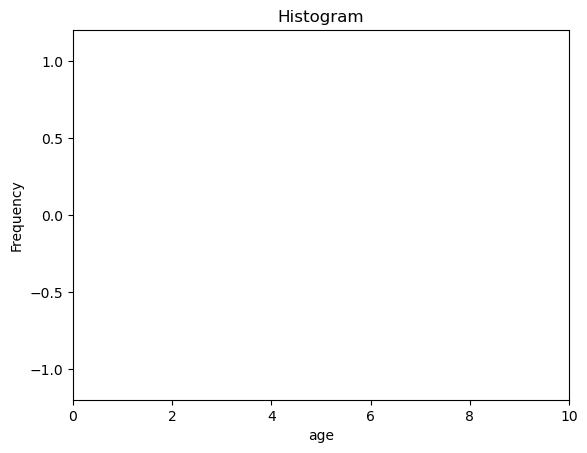

Skewness: 0.5576374421375199
Right skew distribution
Kurtosis: -0.17000808529844624
platykurtic (lighter tail) 


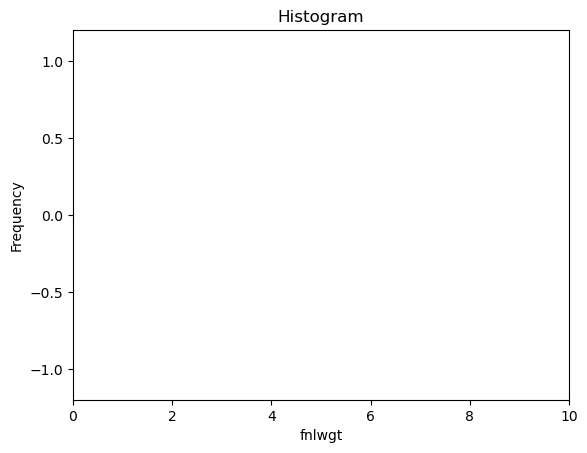

Skewness: 1.4476361664196729
Right skew distribution
Kurtosis: 6.220865614399161
leptokurtic (heavier tail)


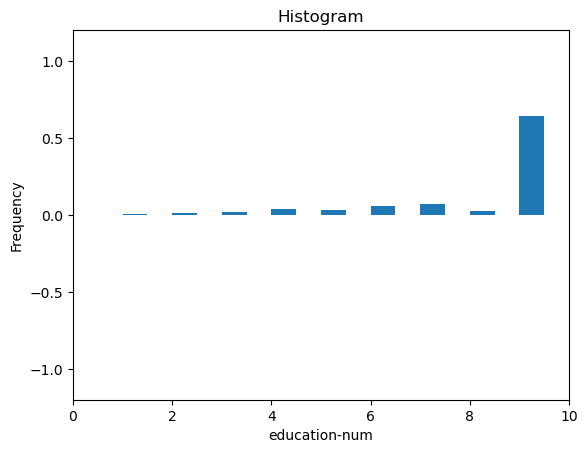

Skewness: -0.30948599142388744
Left skew distribution
Kurtosis: 0.6187449772570002
leptokurtic (heavier tail)


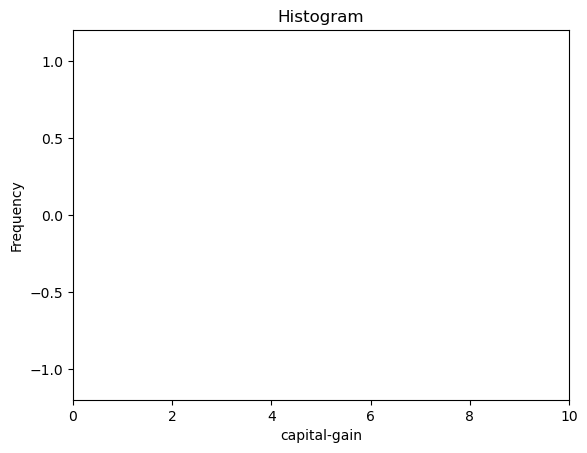

Skewness: 11.948851942756669
Right skew distribution
Kurtosis: 154.6590006263707
leptokurtic (heavier tail)


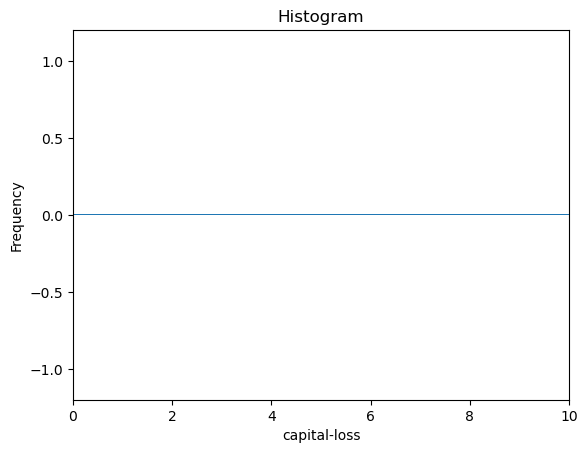

Skewness: 4.592490690725554
Right skew distribution
Kurtosis: 20.354941481410318
leptokurtic (heavier tail)


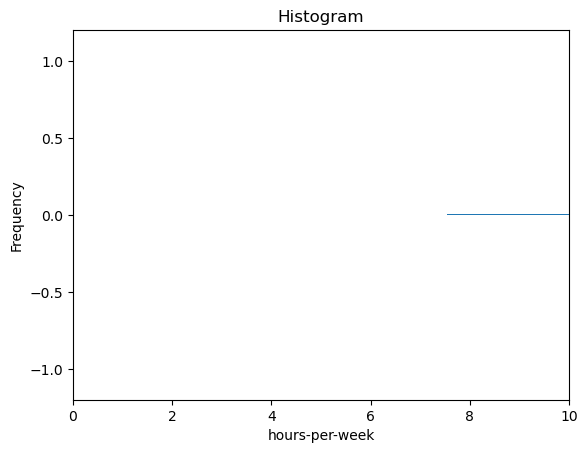

Skewness: 0.22874833162171837
Right skew distribution
Kurtosis: 2.9170854192120776
leptokurtic (heavier tail)


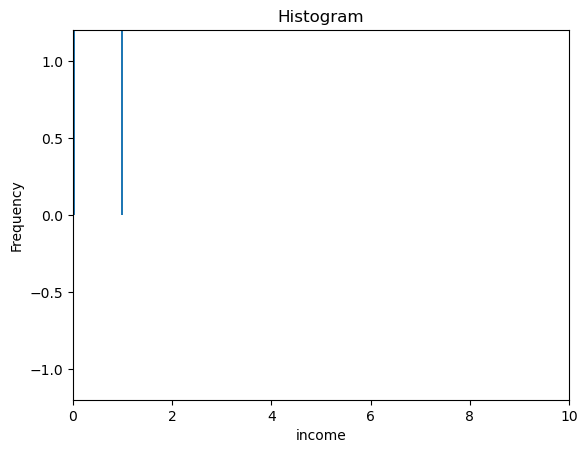

Skewness: 1.211631582839416
Right skew distribution
Kurtosis: -0.531948907466052
platykurtic (lighter tail) 


In [41]:
for feature in num_col.columns:
    # Create a figure and axes
    fig, ax = plt.subplots()

    # Plot the histogram
    ax.hist(num_col[feature], bins=30, density=True)

    # Set labels and title
    ax.set_xlabel(feature)
    ax.set_ylabel('Frequency')
    ax.set_title('Histogram')
    
    min_value = min(num_col[feature])
    max_value = max(num_col[feature])
    
    # Set axis limits
    ax.set_xlim([0, 10])
    ax.set_ylim([-1.2, 1.2])

    # Show the plot
    plt.show()
    skewkness(num_col[feature])
    calculate_kurtosis(num_col[feature])


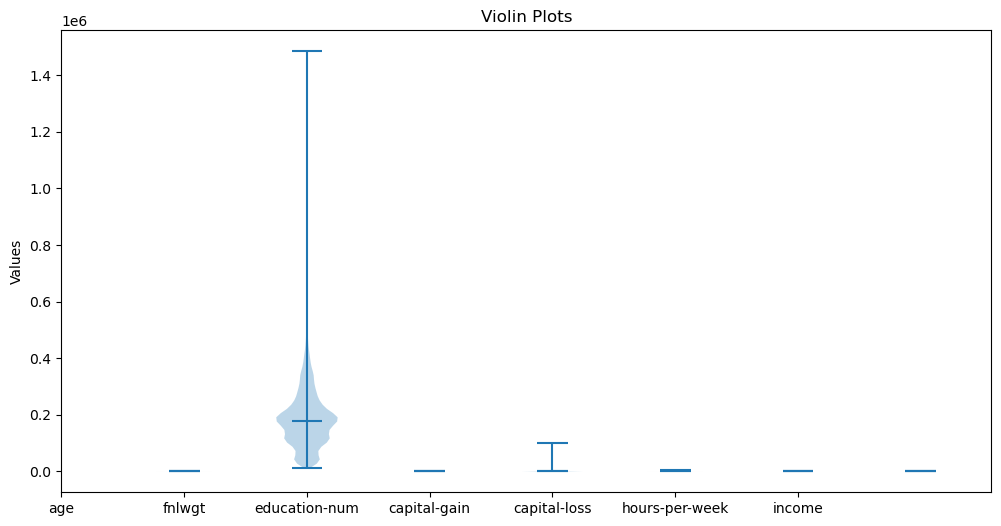

In [42]:
# Create a figure and axes

fig, ax = plt.subplots(figsize=( 12, 6))

# Plot violin plots
ax.violinplot(num_col, showmedians=True)

# Set labels and title
ax.set_xticks(range(len(num_col.columns)))
ax.set_xticklabels(num_col.columns)
ax.set_ylabel('Values')
ax.set_title('Violin Plots')

# Show the plot
plt.show()

Clean the Data:

Handle missing data: Identify missing values and decide how to handle them (e.g., imputation or removal).
Remove duplicates: Identify and remove any duplicated observations.
Handle outliers: Detect outliers and decide whether to keep, remove, or transform them.

In [43]:
new_df = pd.concat([num_col,cat_col],axis=1)

In [44]:
new_df.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,income,workclass,education,marital-status,occupation,relationship,race,sex,country
0,39,77516,13,2174,0,40,0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States
1,50,83311,13,0,0,13,0,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States
2,38,215646,9,0,0,40,0,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States
3,53,234721,7,0,0,40,0,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States
4,28,338409,13,0,0,40,0,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba


In [45]:
new_df.shape

(32537, 15)

In [46]:
new_df.columns

Index(['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss',
       'hours-per-week', 'income', 'workclass', 'education', 'marital-status',
       'occupation', 'relationship', 'race', 'sex', 'country'],
      dtype='object')

In [47]:
categorical_features

NameError: name 'categorical_features' is not defined

In [48]:
categorical_features.columns

NameError: name 'categorical_features' is not defined

In [51]:
target = num_col["income"]
num_col.drop(labels="income", axis=1, inplace=True)
cat_col.drop(labels='education', axis=1, inplace=True)

In [52]:
target.unique()

array([0, 1], dtype=int64)

In [54]:
y = target

In [55]:
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

In [58]:
scaler = StandardScaler().fit(num_col)
preprocessed_numerical_feature = scaler.transform(num_col)

encoder = OneHotEncoder().fit(cat_col)
preprocessed_categorical_feature = encoder.transform(cat_col).toarray()

In [59]:
preprocessed_numerical_feature.shape

(32537, 6)

In [60]:
preprocessed_categorical_feature.shape

(32537, 86)

In [61]:
numeric_df = pd.DataFrame(preprocessed_numerical_feature)
categoric_df = pd.DataFrame(preprocessed_categorical_feature)

In [62]:
preprocessing_df = pd.concat([numeric_df,categoric_df],axis=1) 

In [63]:
preprocessing_df.shape

(32537, 92)

In [64]:
preprocessing_df.head()

,0,1,2,3,4,5,0,1,2,3,...,76,77,78,79,80,81,82,83,84,85
0,0.030390,-1.063569,1.134777,0.148292,-0.216743,-0.035664,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.836973,-1.008668,1.134777,-0.145975,-0.216743,-2.222483,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,-0.042936,0.245040,-0.420679,-0.145975,-0.216743,-0.035664,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,1.056950,0.425752,-1.198407,-0.145975,-0.216743,-0.035664,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,-0.776193,1.408066,1.134777,-0.145975,-0.216743,-0.035664,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [65]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(preprocessing_df, y, test_size=0.3, random_state=42)

In [66]:
X_train.to_csv("data/X_train.csv")
y_train.to_csv("data/y_train.csv")
X_test.to_csv("data/X_test.csv")
y_test.to_csv("data/y_test.csv")

In [67]:
pca = PCA(n_components=55)

In [68]:
pca.fit(preprocessing_df)

PCA(n_components=55)

In [69]:
df_pca = pca.transform(preprocessing_df)

In [70]:
from sklearn.model_selection import train_test_split

In [71]:
X_train, X_test, y_train, y_test = train_test_split(df_pca, y, test_size=0.33, random_state=42)

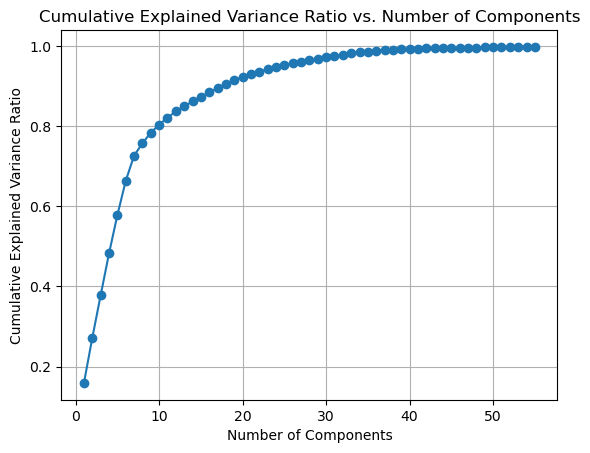

In [72]:
# Calculate cumulative explained variance ratio
cumulative_variance_ratio = np.cumsum(pca.explained_variance_ratio_)

# Plot the cumulative explained variance ratio
plt.plot(range(1, len(cumulative_variance_ratio) + 1), cumulative_variance_ratio, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Cumulative Explained Variance Ratio vs. Number of Components')
plt.grid(True)
plt.show()


In [73]:
pd.DataFrame(X_train).to_csv("data/X_pca_train.csv")
pd.DataFrame(y_train).to_csv("data/y_pca_train.csv")
pd.DataFrame(X_test).to_csv("data/X_pca_test.csv")
pd.DataFrame(y_test).to_csv("data/y_pca_test.csv")

In [75]:
type(preprocessing_df)

pandas.core.frame.DataFrame

In [76]:
type(y)

pandas.core.series.Series

In [78]:
# Apply Random Under-sampling for undersampling
rus = RandomUnderSampler(random_state=42)
preprocessing_undersampled, y_undersampled = rus.fit_resample(preprocessing_df, y)

X_train, X_test, y_train, y_test = train_test_split(preprocessing_undersampled, y_undersampled, test_size=0.33, random_state=42)

pd.DataFrame(X_train).to_csv("data/X_RandomUnderSampler_train.csv")
pd.DataFrame(y_train).to_csv("data/y_RandomUnderSampler_train.csv")
pd.DataFrame(X_test).to_csv("data/X_RandomUnderSampler_test.csv")
pd.DataFrame(y_test).to_csv("data/y_RandomUnderSampler_test.csv")